In [9]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from collections import Counter

In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [12]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [5]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [7]:
rr = Ridge(alpha = 0.01)
rr.fit(X_train, y_train)
print "TRAINING RMSE:", scoreRMSE(rr, X_train, y_train)

TRAINING RMSE: 0.026357953023403557


TRAINING RMSE: 0.02637964186706928
182


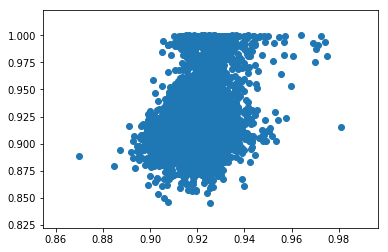

In [62]:
lasso = Lasso(alpha = 0.000001)
lasso.fit(X_train,y_train)
coeff_used = np.sum(lasso.coef_!=0)
print "TRAINING RMSE:", scoreRMSE(lasso, X_train, y_train)
print coeff_used
prediction = lasso.predict(X_train)
plt.scatter(prediction, y_train)

In [70]:
from sklearn.linear_model import ElasticNet
# need to test alpha, l1_ratio
elastic = ElasticNet(random_state = 0, alpha = 0.0001, l1_ratio = 0.3)
elastic.fit(X_train, y_train)
coeff_used = np.sum(elastic.coef_!=0)
print "TRAINING RMSE:", scoreRMSE(elastic, X_train, y_train)
print coeff_used

TRAINING RMSE: 0.027045282763387007
42


In [78]:
sum(X_train.var() > 0.01)

18

Training RMSE:  0.02635315433966467


,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [10]:
# Make predictions using linear regression model fitted above
predictions = linReg.predict(X_test)

In [11]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.934613
1,2,0.925099
2,3,0.922504
3,4,0.934105
4,5,0.926756


In [12]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)